In [ ]:
# untuk menginstalasi pycaret dan shap
#!pip install pycaret
#!pip install shap 

In [1]:
import pandas as pd
from pycaret.classification import * 

[Download Dataset](https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt)

Dalam menggunakan dataset, kadangkala kita dihadapkan dengan categorical data yang tidak selalu dapat diolah secara langsung oleh library yang kita gunakan, oleh karena itu kita perlu mengetahui cara mengolah categorical data dengan benar yang dapat diperlajari lebih lanjut pada [tautan ini](https://www.datacamp.com/tutorial/categorical-data)

In [2]:
df = pd.read_csv("16P.csv",encoding='cp1252') # import dataset
df.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,You feel comfortable just walking up to someone you find interesting and striking up a conversation.,You are not too interested in discussing various interpretations and analyses of creative works.,You are more inclined to follow your head than your heart.,You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.,You rarely worry about whether you make a good impression on people you meet.,You enjoy participating in group activities.,You like books and movies that make you come up with your own interpretation of the ending.,Your happiness comes more from helping others accomplish things than your own accomplishments.,You are interested in so many things that you find it difficult to choose what to try next.,You are prone to worrying that things will take a turn for the worse.,You avoid leadership roles in group settings.,You are definitely not an artistic type of person.,You think the world would be a better place if people relied more on rationality and less on their feelings.,You prefer to do your chores before allowing yourself to relax.,You enjoy watching people argue.,You tend to avoid drawing attention to yourself.,Your mood can change very quickly.,You lose patience with people who are not as efficient as you.,You often end up doing things at the last possible moment.,"You have always been fascinated by the question of what, if anything, happens after death.",You usually prefer to be around others rather than on your own.,You become bored or lose interest when the discussion gets highly theoretical.,You find it easy to empathize with a person whose experiences are very different from yours.,You usually postpone finalizing decisions for as long as possible.,You rarely second-guess the choices that you have made.,"After a long and exhausting week, a lively social event is just what you need.",You enjoy going to art museums.,You often have a hard time understanding other people’s feelings.,You like to have a to-do list for each day.,You rarely feel insecure.,You avoid making phone calls.,You often spend a lot of time trying to understand views that are very different from your own.,"In your social circle, you are often the one who contacts your friends and initiates activities.","If your plans are interrupted, your top priority is to get back on track as soon as possible.",You are still bothered by mistakes that you made a long time ago.,You rarely contemplate the reasons for human existence or the meaning of life.,Your emotions control you more than you control them.,"You take great care not to make people look bad, even when it is completely their fault.",Your personal work style is closer to spontaneous bursts of energy than organized and consistent efforts.,"When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.",You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pas

In [ ]:
df.dtypes #melihat tipe data masing-masing kolom

In [3]:
categorical = ['You regularly make new friends.', 'You spend a lot of your free time exploring various random topics that pique your interest', 
               'Seeing other people cry can easily make you feel like you want to cry too','You often make a backup plan for a backup plan.',
               'You usually stay calm, even under a lot of pressure','At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
               'You prefer to completely finish one project before starting another.','You are very sentimental.','You like to use organizing tools like schedules and lists.',
               'Even a small mistake can cause you to doubt your overall abilities and knowledge.','You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
               'You are not too interested in discussing various interpretations and analyses of creative works.','You are more inclined to follow your head than your heart.',
               'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.','You rarely worry about whether you make a good impression on people you meet.',
               'You enjoy participating in group activities.','You like books and movies that make you come up with your own interpretation of the ending.',
               'Your happiness comes more from helping others accomplish things than your own accomplishments.','You are interested in so many things that you find it difficult to choose what to try next.',
               'You are prone to worrying that things will take a turn for the worse.','You avoid leadership roles in group settings.','You are definitely not an artistic type of person.',
               'You think the world would be a better place if people relied more on rationality and less on their feelings.','You prefer to do your chores before allowing yourself to relax.',
               'You enjoy watching people argue.','You tend to avoid drawing attention to yourself.','Your mood can change very quickly.',
               'You lose patience with people who are not as efficient as you.','You often end up doing things at the last possible moment.','You have always been fascinated by the question of what, if anything, happens after death.',
               'You usually prefer to be around others rather than on your own.','You become bored or lose interest when the discussion gets highly theoretical.',
               'You find it easy to empathize with a person whose experiences are very different from yours.','You usually postpone finalizing decisions for as long as possible.',
               'You rarely second-guess the choices that you have made.','After a long and exhausting week, a lively social event is just what you need.',
               'You enjoy going to art museums.','You often have a hard time understanding other people’s feelings.','You like to have a to-do list for each day.',
               'You rarely feel insecure.','You avoid making phone calls.','You often spend a lot of time trying to understand views that are very different from your own.',
               'In your social circle, you are often the one who contacts your friends and initiates activities.','If your plans are interrupted, your top priority is to get back on track as soon as possible.',
               'You are still bothered by mistakes that you made a long time ago.','You rarely contemplate the reasons for human existence or the meaning of life.',
               'Your emotions control you more than you control them.','You take great care not to make people look bad, even when it is completely their fault.',
               'Your personal work style is closer to spontaneous bursts of energy than organized and consistent efforts.','When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.',
               'You would love a job that requires you to work alone most of the time.','You believe that pondering abstract philosophical questions is a waste of time.',
               'You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.','You know at first glance how someone is feeling.',
               'You often feel overwhelmed.','You complete things methodically without skipping over any steps.','You are very intrigued by things labeled as controversial.',
               'You would pass along a good opportunity if you thought someone else needed it more.','You struggle with deadlines.','You feel confident that things will work out for you.'] 
               # menentukan kolom kategorikal

In [4]:
testing = setup(df, target='Personality', categorical_features=categorical) # melakukan persiapan untuk melakukan komparasi model

,Description,Value
0,session_id,4624
1,Target,Personality
2,Target Type,Multiclass
3,Label Encoded,"ENFJ: 0, ENFP: 1, ENTJ: 2, ENTP: 3, ESFJ: 4, ESFP: 5, ESTJ: 6, ESTP: 7, INFJ: 8, INFP: 9, INTJ: 10, INTP: 11, ISFJ: 12, ISFP: 13, ISTJ: 14, ISTP: 15"
4,Original Data,"(59999, 62)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,60
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
numeric = compare_models() # digunakan untuk mendapatkan model terbaik

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9434,0.9936,0.9434,0.9437,0.9434,0.9396,0.9396,2.1350
lr,Logistic Regression,0.9239,0.9930,0.9238,0.9243,0.9239,0.9189,0.9189,13.5360
svm,SVM - Linear Kernel,0.9158,0.0000,0.9156,0.9173,0.9156,0.9101,0.9103,1.8220
lda,Linear Discriminant Analysis,0.9068,0.9919,0.9067,0.9071,0.9068,0.9006,0.9006,1.5800
ridge,Ridge Classifier,0.8916,0.0000,0.8913,0.8923,0.8908,0.8843,0.8845,0.1190
et,Extra Trees Classifier,0.8869,0.9863,0.8867,0.8877,0.8867,0.8793,0.8794,4.9790
rf,Random Forest Classifier,0.8726,0.9843,0.8725,0.8738,0.8723,0.8641,0.8642,3.3160
gbc,Gradient Boosting Classifier,0.8563,0.9873,0.8562,0.8568,0.8563,0.8468,0.8468,64.3480
nb,Naive Bayes,0.8519,0.9758,0.8518,0.8566,0.8517,0.8421,0.8424,0.4040
knn,K Neighbors Classifier,0.8216,0.9661,0.8215,0.8284,0.8218,0.8097,0.8102,42.9420


In [4]:
#improve performa dari models
#tuning options dapat dipelajari di "https://pycaret.readthedocs.io/en/latest/api/classification.html"
tune = setup(df, target='Personality', normalize = True, imputation_type = 'iterative')

,Description,Value
0,session_id,1803
1,Target,Personality
2,Target Type,Multiclass
3,Label Encoded,"ENFJ: 0, ENFP: 1, ENTJ: 2, ENTP: 3, ESFJ: 4, ESFP: 5, ESTJ: 6, ESTP: 7, INFJ: 8, INFP: 9, INTJ: 10, INTP: 11, ISFJ: 12, ISFP: 13, ISTJ: 14, ISTP: 15"
4,Original Data,"(59999, 62)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,60
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
tune_best = compare_models() # digunakan untuk mendapatkan model terbaik

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9447,0.9939,0.9447,0.9450,0.9447,0.9411,0.9411,2.1680
lr,Logistic Regression,0.9241,0.9932,0.9241,0.9244,0.9241,0.9191,0.9191,14.0900
svm,SVM - Linear Kernel,0.9171,0.0000,0.9170,0.9188,0.9172,0.9116,0.9117,1.8550
lda,Linear Discriminant Analysis,0.9096,0.9921,0.9095,0.9099,0.9095,0.9036,0.9036,1.6390
ridge,Ridge Classifier,0.8934,0.0000,0.8932,0.8943,0.8926,0.8863,0.8865,0.1180
et,Extra Trees Classifier,0.8860,0.9869,0.8859,0.8868,0.8859,0.8784,0.8785,4.8580
rf,Random Forest Classifier,0.8729,0.9845,0.8727,0.8739,0.8727,0.8644,0.8645,3.2770
gbc,Gradient Boosting Classifier,0.8574,0.9876,0.8573,0.8579,0.8574,0.8479,0.8480,66.9780
nb,Naive Bayes,0.8485,0.9760,0.8483,0.8536,0.8478,0.8384,0.8388,0.3960
knn,K Neighbors Classifier,0.8205,0.9663,0.8204,0.8278,0.8209,0.8085,0.8090,43.7850


In [6]:
rf = create_model("lightgbm") #membuat model dari list yang ada

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9498,0.9945,0.9498,0.9501,0.9498,0.9464,0.9464
1,0.9381,0.9936,0.9380,0.9382,0.9380,0.9340,0.9340
2,0.9438,0.9936,0.9437,0.9440,0.9438,0.9401,0.9401
3,0.9450,0.9940,0.9450,0.9453,0.9450,0.9413,0.9414
4,0.9471,0.9941,0.9471,0.9475,0.9471,0.9436,0.9437
5,0.9455,0.9940,0.9455,0.9458,0.9455,0.9418,0.9419
6,0.9424,0.9930,0.9423,0.9427,0.9424,0.9385,0.9386
7,0.9450,0.9941,0.9450,0.9453,0.9450,0.9413,0.9414
8,0.9431,0.9940,0.9431,0.9433,0.9431,0.9393,0.9393


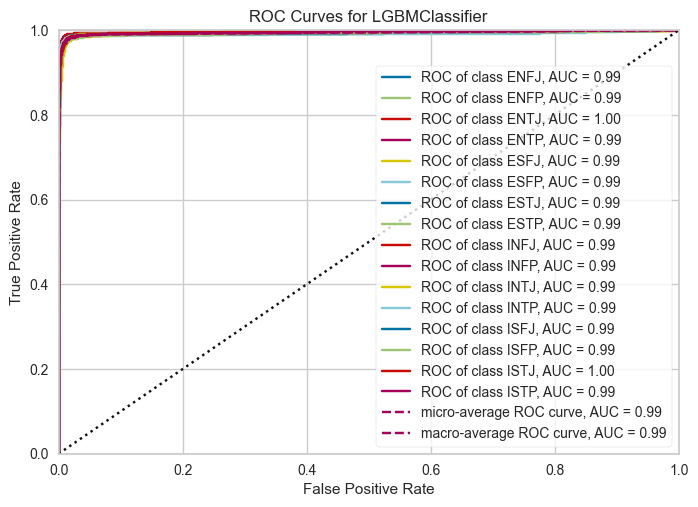

In [9]:
plot_model(rf) #evaluate model

In [24]:
predict_model(rf) # untuk melihat hasil prediksi model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9464,0.9937,0.9465,0.9466,0.9465,0.9429,0.9429


,You regularly make new friends._-1,You regularly make new friends._-2,You regularly make new friends._0,You regularly make new friends._1,You spend a lot of your free time exploring various random topics that pique your interest_-1,You spend a lot of your free time exploring various random topics that pique your interest_0,You spend a lot of your free time exploring various random topics that pique your interest_1,Seeing other people cry can easily make you feel like you want to cry too_-1,Seeing other people cry can easily make you feel like you want to cry too_-2,Seeing other people cry can easily make you feel like you want to cry too_-3,...,You feel confident that things will work out for you._-1,You feel confident that things will work out for you._-2,You feel confident that things will work out for you._-3,You feel confident that things will work out for you._0,You feel confident that things will work out for you._1,You feel confident that things will work out for you._2,You feel confident that things will work out for you._3,Personality,Label,Score
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,ENTJ,ENTJ,0.9933
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,ESFP,ESFP,0.5228
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,ENFP,ENFP,0.8296
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ENTP,ENTP,0.9914
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ENTP,ENTP,0.9438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,ESFP,ESFP,0.9991
17996,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,INFJ,INFJ,0.9993
17997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,ENTP,ENTP,0.6768
17998,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,INTJ,INTJ,0.9925


In [25]:
save_model(rf, model_name="lightgbmModelPersonality") # export model

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Response Id'],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Personality', time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, 

In [26]:
model = load_model("lightgbmModelPersonality") # load model

Transformation Pipeline and Model Successfully Loaded


In [27]:
df.tail()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ
59998,59998,0,0,2,0,-1,0,0,0,2,...,0,-1,0,3,1,0,1,0,-1,INFJ


In [28]:
data_test = {
            'You regularly make new friends.' : [2], 
            'You spend a lot of your free time exploring various random topics that pique your interest' : [-2],
            'Seeing other people cry can easily make you feel like you want to cry too' : [2],
            'You often make a backup plan for a backup plan.' : [0],
            'You usually stay calm, even under a lot of pressure' : [2],
            'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know' : [-3],
            'You prefer to completely finish one project before starting another.' : [0],
            'You are very sentimental.' : [1],
            'You like to use organizing tools like schedules and lists.' : [3],
            'Even a small mistake can cause you to doubt your overall abilities and knowledge.' : [1],
            'You feel comfortable just walking up to someone you find interesting and striking up a conversation.' : [-1],
            'You are not too interested in discussing various interpretations and analyses of creative works.' : [3],
            'You are more inclined to follow your head than your heart.' : [3],
            'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.' : [1],
            'You rarely worry about whether you make a good impression on people you meet.' : [-1],
            'You enjoy participating in group activities.' : [1],
            'You like books and movies that make you come up with your own interpretation of the ending.' : [1],
            'Your happiness comes more from helping others accomplish things than your own accomplishments.' : [-3],
            'You are interested in so many things that you find it difficult to choose what to try next.' : [0],
            'You are prone to worrying that things will take a turn for the worse.' : [1],
            'You avoid leadership roles in group settings.' : [-2],
            'You are definitely not an artistic type of person.' : [1],
            'You think the world would be a better place if people relied more on rationality and less on their feelings.' : [2],
            'You prefer to do your chores before allowing yourself to relax.' : [3],
            'You enjoy watching people argue.' : [1],
            'You tend to avoid drawing attention to yourself.' : [1],
            'Your mood can change very quickly.' : [1],
            'You lose patience with people who are not as efficient as you.' : [-1],
            'You often end up doing things at the last possible moment.' : [0],
            'You have always been fascinated by the question of what, if anything, happens after death.' : [-1],
            'You usually prefer to be around others rather than on your own.' : [1],
            'You become bored or lose interest when the discussion gets highly theoretical.' : [1],
            'You find it easy to empathize with a person whose experiences are very different from yours.' : [1],
            'You usually postpone finalizing decisions for as long as possible.' : [-1],
            'You rarely second-guess the choices that you have made.' : [1],
            'After a long and exhausting week, a lively social event is just what you need.' : [3],
            'You enjoy going to art museums.' : [1],
            'You often have a hard time understanding other people’s feelings.' : [-2],
            'You like to have a to-do list for each day.' : [1],
            'You rarely feel insecure.' : [1],
            'You avoid making phone calls.' : [1],
            'You often spend a lot of time trying to understand views that are very different from your own.' : [-3],
            'In your social circle, you are often the one who contacts your friends and initiates activities.' : [1],
            'If your plans are interrupted, your top priority is to get back on track as soon as possible.' : [0],
            'You are still bothered by mistakes that you made a long time ago.' : [-1],
            'You rarely contemplate the reasons for human existence or the meaning of life.' : [3],
            'Your emotions control you more than you control them.' : [1],
            'You take great care not to make people look bad, even when it is completely their fault.' : [0],
            'Your personal work style is closer to spontaneous bursts of energy than organized and consistent efforts.' : [0],
            'When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.' : [0],
            'You would love a job that requires you to work alone most of the time.' : [-1],
            'You believe that pondering abstract philosophical questions is a waste of time.' : [3],
            'You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.' : [1],
            'You know at first glance how someone is feeling.' : [1],
            'You often feel overwhelmed.' : [0],
            'You complete things methodically without skipping over any steps.' : [1],
            'You are very intrigued by things labeled as controversial.' : [1],
            'You would pass along a good opportunity if you thought someone else needed it more.' : [-1],
            'You struggle with deadlines.' : [3],
            'You feel confident that things will work out for you.' : [-2],
}
dt = pd.DataFrame(data_test)

In [29]:
predict_model(model, data=dt)

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Label,Score
0,2,-2,2,0,2,-3,0,1,3,1,...,1,1,0,1,1,-1,3,-2,ENFJ,0.3323




------------------------------------------------

Contoh Machine Learning Manual:


1.   [Linear Regression](https://colab.research.google.com/drive/1hV9ZQS3upIJ5LsrIiORnqn0rM-yozr7D?usp=sharing)
2.   [Quadratic Discriminant Analysis](https://colab.research.google.com/drive/1rrFNVsiTrh8mUPW-Lv3IQ51PKPUY-8qI?usp=sharing)
3.   [Ridge Classifier](https://colab.research.google.com/drive/14lyFndNOklyR0smeIXNWALNNNbuV5eaG?usp=sharing)

------------------------------------------------
1.  [Clean Code Supervised Learning](https://colab.research.google.com/drive/1MfHzkZSpt9zeZytT_Ql9YSOzOMA86BSA?usp=sharing)
2.  [PyCaret (Unsupervised Learning/Clustering)](https://colab.research.google.com/drive/1ky-0K_g2YGSGwmWq2wYKGPzW_tngjFnY?usp=sharing)